In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section 1 - Data Preparation

In [5]:
# Loading the data 
#x_train
X = pd.read_csv('/home/raghav/codes new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/train/Linear_X_Train.csv')
#y_train
y = pd.read_csv('/home/raghav/codes new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/train/Linear_Y_Train.csv')
X.shape,y.shape

((3750, 1), (3750, 1))

In [6]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [7]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [15]:
# converting X and y into numpy arrays using .values
X = X.values
y = y.values


In [17]:
# Normalisation - substract by mean and divide by standard deviation
u = X.mean()
std = X.std()
X = (X-u)/std

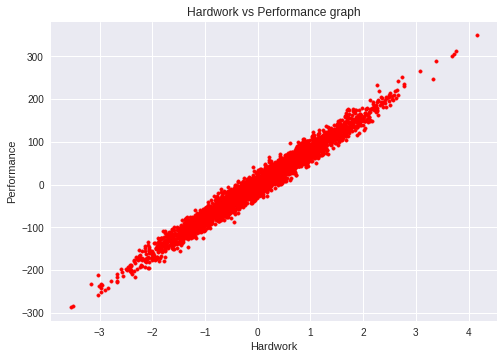

In [20]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='red',marker='.')
plt.title('Hardwork vs Performance graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

### Section 2 - Modelling